In [164]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np

In [165]:
str_filename = '333_sales.csv'
str_filename2 = '333_mint.csv'

In [166]:
fh = open(str_filename)
csv_reader = csv.reader(fh)
fh_mint = open(str_filename2)
csv_reader2 = csv.reader(fh_mint)
fh_temp = open('temp.csv', 'w')

In [167]:
writer = csv.writer(fh_temp, delimiter=',')
writer.writerow( ['ID'] + next(csv_reader2))
writer.writerows([i] + row for i, row in enumerate(csv_reader2, 1))

In [168]:
fh_temp.close()
fh_temp = open('temp.csv', "rt")
csv_reader_temp = csv.reader(fh_temp)
csv_header = next(csv_reader)
csv_header2 = next(csv_reader_temp)
csv_header2.append('temp')

In [169]:
fh.close()
fh_mint.close()
fh_temp.close()

In [170]:
df_sig = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
df_sig
df_sig2 = pd.read_csv('temp.csv', header=None, skiprows=1, names=csv_header2)
i = 0
for row in df_sig['block_time']:
    row = row.replace('+00:00', '')
    row = row.replace('T', ' ')
    df_sig.at[i, 'block_time'] = row
    i += 1
df_sig2

,ID,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $1625.58/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method,temp
0,1,0xa474553ca066b70a436dd95415f356b04860e819af13...,15222959,1658904791,2022-07-27 06:53:11,0xdad19177128fc63b9de5aac7c9afb08ede8830dd,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.130000,0,211.325400,0.004305,6.998057,1636.88,Error(0),execution reverted,Purchase,NaN
1,2,0x4e181ba36be9d152cb54f225ddd57c44689358579ff8...,15222959,1658904791,2022-07-27 06:53:11,0xdad19177128fc63b9de5aac7c9afb08ede8830dd,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.130000,0,211.325400,0.004305,6.998057,1636.88,Error(0),execution reverted,Purchase,NaN
2,3,0x65d411501befbe5a18f391dadc8e3830958c0ff04bbe...,15222959,1658904791,2022-07-27 06:53:11,0xdad19177128fc63b9de5aac7c9afb08ede8830dd,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.130000,0,211.325400,0.004305,6.998057,1636.88,Error(0),execution reverted,Purchase,NaN
3,4,0xb0cbdd87d88b5e5ec4612e144badae357b1c0e285894...,15225807,1658942317,2022-07-27 17:18:37,0xfdbf0a421cee3fee86840d996d9feab7cbc2bb35,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,3.134796,0,5095.862069,0.008349,13.571977,1636.88,NaN,NaN,Purchase,NaN
4,5,0xedc4a47b65b1f19c69a29170796d1649709126301f90...,15225813,1658942391,2022-07-27 17:19:51,0x50e2f9a0c55e67f0ac15e8b166a5baaf37b7436b,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.884013,0,4688.193103,0.008420,13.687978,1636.88,NaN,NaN,Purchase,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,775,0x8cc4f82ad7fbf0547e972dd104b105779c67e3d830e5...,15225843,1658942759,2022-07-27 17:25:59,0xb684afe21d28dc6bf235ca7c7da3c21df19b3bcd,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.223746,0,3614.877155,0.001792,2.913124,1636.88,Error(0),execution reverted,Purchase,NaN
775,776,0x620320cbd5d4d041720e681df2a88ec7fb02d3d6115b...,15225849,1658942826,2022-07-27 17:27:06,0x89f91207a474de60974bab7aa939d247cc131201,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.249216,0,3656.281034,0.001614,2.623881,1636.88,Error(0),execution reverted,Purchase,NaN
776,777,0x2788828f456c947a9ae28a2b428d70672692af1b648f...,15225850,1658942830,2022-07-27 17:27:10,0x57e060078b1b9e67dd7d2df0debeab433aa411f9,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.235502,0,3633.986638,0.001573,2.556332,1636.88,Error(0),execution reverted,Purchase,NaN
777,778,0xdefea8a7e2a5c0c2b2d960c6927f08514ea948188ba3...,15226015,1658945126,2022-07-27 18:05:26,0xe18fc96ba325ef22746ada9a82d521845a2c16f8,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.000000,0,0.000000,0.012490,20.302973,1636.88,NaN,NaN,Set Auction Details,NaN


In [171]:
df_sig['Date'] = df_sig['block_time'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df_sig['Date']
df_sig2['Date'] = df_sig2['DateTime'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

2.192398119122257


Text(0, 0.5, 'eth_price(eth)/final mint price')

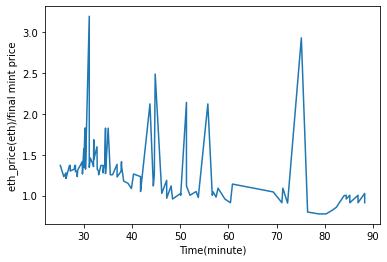

In [172]:
mintStart = datetime.strptime("2022-07-27 17:00:00", '%Y-%m-%d %H:%M:%S')
endDate = datetime.strptime("2022-07-27 18:30:00", '%Y-%m-%d %H:%M:%S')
collection_size = 500
df_sig2 = df_sig2.loc[(df_sig2['Date'] >= mintStart)]
df_new=df_sig.loc[(df_sig['Date'] <= endDate)]
df_new=df_new.loc[(df_sig['Date'] >= mintStart)]
df_sig2 = df_sig2.loc[(df_sig2['ErrCode'] != 'execution reverted')]
final_mint_price = df_sig2['Value_IN(ETH)']
print(final_mint_price[collection_size])
x = df_new['Date'] - mintStart
x = (x.dt.total_seconds() / 60)
y = (df_new['eth_price'] / final_mint_price[collection_size])
plt.plot(x, y)
plt.xlabel('Time(minute)')
plt.ylabel('eth_price(eth)/final mint price')